# Online Retail

## Introduction

This is a trans-national data set which contains all the transactions occurring between `01/12/2010` and `09/12/2011` for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The details about given dataset is as follows - 

* `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter `'c'`, it indicates a cancellation. 
* `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* `Description`: Product (item) name. Nominal.
* `Quantity`: The quantities of each product (item) per transaction. Numeric.	
* `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* `UnitPrice`: Unit price. Numeric, Product price per unit in sterling.
* `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* `Country`: Country name. Nominal, the name of the country where each customer resides. 

Further details about this dataset can be found from [here](https://archive.ics.uci.edu/dataset/352/online+retail).


## Data Loading and Initial Exploration

First we will load this data and perform initial exploration of the given dataset.

In [17]:
import pandas as pd

retail=pd.read_excel('Online Retail.xlsx')

In [18]:
retail.head() #First five rows of the given dataset

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [19]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As can be seen from above, The given dataset overall has `541909` rows of data, where the columns `Description` and `CustomerID` are having `1454` and `135080` null values respectively.

In [20]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [30]:
retail.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country         Month   
581587     23256      CHILDRENS CUTLERY SPACEBOY           4         2011-12-09 12:50:00  4.15       12680       France          December    1
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER    6         2010-12-01 08:26:00  4.25       17850       United Kingdom  December    1
           22752      SET 7 BABUSHKA NESTING BOXES         2         2010-12-01 08:26:00  7.65       17850       United Kingdom  December    1
           71053      WHITE METAL LANTERN                  6         2010-12-01 08:26:00  3.39       17850       United Kingdom  December    1
581586     22061      LARGE CAKE STAND  HANGING STRAWBERY  8         2011-12-09 12:49:00  2.95       13113       United Kingdom  December    1
                                                                                                                                            ..
5363

It can be seen that the given dataset also has incorrect data types for columns. This may have happened due to the presence of "Invalid Data" in the source dataset. In the first glance it can be seen that some columns have invalid values, for example `Quantity` column has negative values, which is not possible. 

Since, we now know that the dataset indeed contains missing and invalid values, we will now perform data cleaning on this dataset and prepare it for further analysis. 

## Data Cleaning

First, we will drop the rows with missing customer IDs. 

In [31]:
retail.dropna(subset=["CustomerID"],inplace=True)

Next, we remove the records where the ordered items are cancelled. This is depicted by when the `InvoiceNo` code starts with letter 'c', as it indicates a cancellation.

In [32]:
retail=retail[~retail['InvoiceNo'].astype(str).str.startswith('C')]
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   Month        392692 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB
None


Next, we will remove rows with negative values in `Quantity` and `UnitPrice` columns. This is because Quantity and Unit Price can never be negative in real-life situation and since we dont have any given conditions to impute such data, we will entirely remove the rows pertaining to such values. 

In [33]:
retail=retail[retail["Quantity"]>0]
retail=retail[retail["UnitPrice"]>0]

Now we will check our dataset for duplicate records, which can induce bias and skewness into our analysis and can therefore result in erroneous results. 

In [34]:
print(retail.duplicated().sum())

0


In [35]:
retail.drop_duplicates(inplace=True)
retail["CustomerID"]=retail["CustomerID"].astype(int)

In [36]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   Month        392692 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


## Exploratory Data Analysis

Now, after Data Cleaning, let us further explore the data to get an insight into purchasing patterns, customer behaviour and sales trends. 

### Top Products

Let us identify the products which are most popular.

In [37]:
top_10_prod=retail.groupby(by="Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_10_prod)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


These are the top 10 items by the quantity sold.

## Sales by Country

Next, we look at the total sales figures by country. `Total Sales Price` is calculated by taking a product of `Unit Price` and `Quantity` columns

In [42]:
retail["TotalPrice"]=retail["UnitPrice"]*retail["Quantity"]

sales_by_country=retail.groupby(by="Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
print(sales_by_country)
sales_by_country=sales_by_country*100.0/retail["TotalPrice"].sum()
print(sales_by_country)

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalPrice, dtype: float64
Country
United Kingdom    81.972020
Netherlands        3.211878
EIRE               2.984767
Germany            2.573118
France             2.350955
Australia          1.557900
Spain              0.692665
Switzerland        0.635114
Belgium            0.463546
Sweden             0.431720
Name: TotalPrice, dtype: float64


#### Analysis

Since the Online Retail Store in consideration is based in UK, therefore ~82% of its total sales is constituted by the `United Kingdom`. This statistic exhibits that the store does not have significant presence outside of the United Kingdom. 

Therefore, the store should establish necessary logistics and supply chain to have a significant presence in neighbouring Europian Countries, after which a formal expansion strategy can be established. 

### Time-Based Analysis

Since we have timestamp information in `InvoiceDate` column, we will next perform a Time-Based Analysis of the Data.

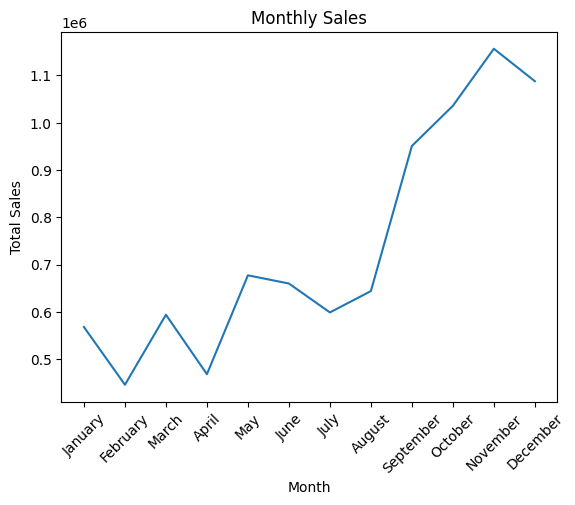

In [39]:
import datetime as dt

retail["Month"]=retail["InvoiceDate"].dt.strftime("%B")
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
retail["Month"] = pd.Categorical(retail["Month"], categories=month_order, ordered=True)
monthly_sales=retail.groupby(by="Month",observed=True)["TotalPrice"].sum()

import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', title='Monthly Sales')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(len(month_order)),labels=month_order,rotation=45)
plt.show()

#### Analysis

From the above line plot, it can be seen that majority of the total sales occur in the months of `September-December`, where the sales figures for each of these months are above 1 Million Pound Sterling.

This can be attributed to increased purchases of gifts for the Christmas and Holiday season during the end of each year.

## RFM Analysis

RFM Analysis is a marketing technique used to quantify and evaluate customer value by focusing on three dimensions:

* **Recency (R)**: How recently a customer made a purchase.
* **Frequency (F)**: How often a customer makes a purchase.
* **Monetary (M)**: How much money a customer spends on purchases.

This type of analysis is useful for segmenting customers into different categories based on their purchasing behavior, allowing businesses to tailor their marketing strategies effectively.

### Recency

Recency refers to how recently a customer has made a purchase. 

We will calculate it by taking the difference between the latest date in the dataset and the last purchase date of each customer.

In [43]:
ref_date=retail["InvoiceDate"].max()+pd.Timedelta(days=1)
recency=retail.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (ref_date - x).days)

### Frequency

Frequency measures how many transactions a customer has made. 

We will count the number of unique invoices per customer.

In [44]:
frequency=retail.groupby('CustomerID')['InvoiceNo'].nunique()

### Monetary

We will calculate this by calculating the total spend by each customer

In [45]:
monetary=retail.groupby('CustomerID')["TotalPrice"].sum()

### Create RFM Table

Now, we combine the Recency, Frequency, and Monetary values into a single DataFrame to create a table called `rfm` 

In [47]:
rfm=pd.DataFrame({'Recency':recency,"Frequency":frequency,"Monetary":monetary})
rfm=rfm[rfm["Monetary"]>0]
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40

### Score RFM Metrics

To perform customer segmentation, we need to score each customer based on their Recency, Frequency, and Monetary values. We typically assign a score from 1 to 5 for each metric (with 5 being the best score and 1 the worst).

#### Recency Scoring

A lower recency value is better (customers who have purchased recently are more valuable).

Here we divide Recency into 5 bins and reverse the labels so that 5 is recent, 1 is older

In [48]:
rfm['R_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

#### Frequency Scoring

Higher frequency is better (customers who purchase frequently are more valuable).

Here we divide Frequency into 5 bins with 5 being the most frequent customers

In [49]:
rfm["F_score"]=pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])

#### Monetary Scoring

Higher monetary value is better (customers who spend more are more valuable).

Here we divide Monetary into 5 bins with 5 being the highest spending customers

In [50]:
rfm["M_score"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

### Create RFM Score

Combine the Recency, Frequency, and Monetary scores to create an overall RFM score for each customer. This can be done by concatenating the scores into a single string.

In [51]:
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

print(rfm.head())

            Recency  Frequency  Monetary R_score F_score M_score RFM_score
CustomerID                                                                
12346           326          1  77183.60       1       1       5       115
12347             2          7   4310.00       5       5       5       555
12348            75          4   1797.24       2       4       4       244
12349            19          1   1757.55       4       1       4       414
12350           310          1    334.40       1       1       2       112


## Customer Segmentation (RFM Approach)

Since we now have RFM scores, we will now segment customers into categories based on their RFM scores. 

Below are the details on how we choose to classify customers on the basis of their RFM values. 

### 1. Champions
**Criteria**: High Recency (5), High Frequency (4-5), High Monetary (4-5)

Champions represent the most loyal customer segment. These customers have recently made purchases, made those purchases frequently, and they have been the most prolific spenders. These customers are regularly engaging with the brand and they are likely to spread good word-of-mouth marketing for the brand.

**Characteristics:**
* Customers in this segment keep making the most recent purchases.
* The frequency of purchases is consistent
* Monetary spending per transaction is high.

**Business Implications**
Champions are important for a business's long-term stable growth. They provide a reliable revenue stream and have the potential to influence other customers through word-of-mouth marketing for the brand. Retaining and increasing the number of customers in this segment should be the most important priority.

### 2. Loyal Customers
**Criteria**: Medium to High Frequency (3-5), Medium to High Monetary (3-5)

For any business, loyal customers are just as crucial as champions. Even though they might not be prolific buyers, they nevertheless make frequent purchases and spend a lot of money.

**Characteristics:** 
* The frequency of purchases is steady and comparable to Champion's market sector.
* A substantial contribution to income is ensured by lower average monetary spending and larger volumes in comparison to the Champion segment.
* Customers' participation in this category can be further increased by offering a stimulus.

**Business Implications**:
This segment represents stability and predictability in our customer base. They are prime candidates for upselling and cross-selling initiatives. Focusing on enhancing their experience and value perception can potentially elevate them to the Champions category.

### 3. Potential Loyalists
**Criteria**: High Recency (5), Low Frequency (1-2), Low to Medium Monetary (1-2)

Customers who have recently interacted with our business but have not yet developed a habit of making regular or expensive purchases are considered potential loyalists. They stand for unrealized growth potential.

**Characteristics**:
* Recent infrequent or first-time purchases
* Less frequent and less valuable in terms of money than Champions and Loyal Customers
* Possibility of higher involvement

**Business Implications**:
This market is essential to the expansion of the company. These consumers can become Champions or Loyal Customers with the correct nurturing techniques. To promote larger spending and more frequent purchases, they need focused interaction.

### 4. At Risk Customers
**Criteria**: Low Recency (1-2), Medium Frequency (3-5), Medium Monetary (3-5)

Customers who had previously been valuable but haven't made any recent purchases are considered to be at risk. If they are not successfully re-engaged, they pose a risk of churning.

**Characteristics**:
* A history of frequent purchasing
* A substantial historical monetary contribution
* A recent drop in involvement

**Business Implications**:
In order to avoid churn, this section needs to be addressed right away. It's critical to identify the causes of their recent inactivity and put focused re-engagement tactics into place. Revenue and customer retention rates can be greatly impacted by successfully reactivating these clients.

### 5. Hibernating Customers
**Criteria**: Low Recency (1-2), Low Frequency (1-2), Low Monetary (1-2)

Out of all the RFM indicators, hibernating customers have the lowest engagement. They rarely buy, haven't bought anything recently, and when they do, they don't spend much.

**Characteristics**:
* Infrequent and low-value purchases
* Lowest recent brand interaction
* Highest risk of churn or possible churn already

**Business Implications**:
Despite its apparent lack of value, this part offers a chance for learning and reactivation. Gaining insight into the reasons behind these consumers' disengagement can help avoid future churn in other segments. To re-engage these clients and possibly move them into more valuable sectors, targeted, inexpensive reactivation efforts might be used.

In [56]:
def rfm_segment(rfm):
    if rfm['R_score'] == 5 and rfm['F_score'] in [4, 5] and rfm['M_score'] in [4, 5]:
        return 'Champions'
    elif rfm['F_score'] in [3, 4, 5] and rfm['M_score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif rfm['R_score'] == 5 and rfm['F_score'] in [1, 2] and rfm['M_score'] in [1,2]:
        return 'Potential Loyalists'
    elif rfm['R_score'] in [1, 2] and rfm['F_score'] in [3, 4, 5] and rfm['M_score'] in [3,4,5]:
        return 'At Risk'
    elif rfm['R_score'] in [1, 2] and rfm['F_score'] in [1, 2] and rfm['M_score'] in [1,2]:
        return 'Hibernating'
    else:
        return 'Normal'


rfm["Segment"]=rfm.apply(rfm_segment,axis=1)

print(rfm.head())

            Recency  Frequency  Monetary R_score F_score M_score RFM_score  \
CustomerID                                                                   
12346           326          1  77183.60       1       1       5       115   
12347             2          7   4310.00       5       5       5       555   
12348            75          4   1797.24       2       4       4       244   
12349            19          1   1757.55       4       1       4       414   
12350           310          1    334.40       1       1       2       112   

                    Segment  
CustomerID                   
12346                Normal  
12347             Champions  
12348       Loyal Customers  
12349                Normal  
12350           Hibernating  


### Analyze Segments

Now that the customers are segmented, we will proceed ahead to analyze each segment to better understand the customer base.

In [57]:
segment_counts=rfm['Segment'].value_counts()
print(segment_counts)

Segment
Loyal Customers        1619
Normal                 1276
Hibernating             821
Champions               555
Potential Loyalists      67
Name: count, dtype: int64


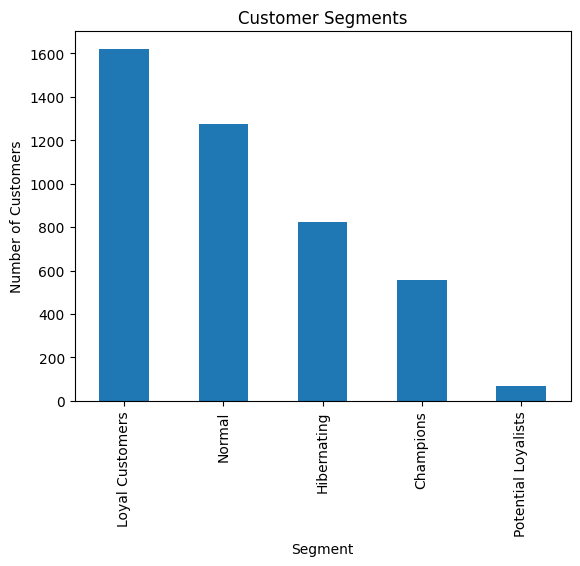

In [60]:
segment_counts.plot(kind="bar",title="Customer Segments")
plt.ylabel("Number of Customers")
plt.show()

The above analysis shows that there are an alarming number of `Hibernating` customers (`821`), who are most likely on the verge of churning. Therefore, such customers should be reactivation campaigns or special promotions to stimulate their buying behaviour and move them into better categories. 

## Prediction of Customer Churn

As per our previous RFM analysis, we can say that the customers who did not make any purchase for more than 180 days can be said to have "churned". Therefore, proceeding ahead with our analysis, we now buiild a Machine Learning model for predicting Customer Churn. 

Moving ahead, we first create our target variable. 

In [61]:
from sklearn.model_selection import train_test_split

rfm["Churned"]= (rfm["Recency"]>180).astype(int)

### Feature Selection

We can also add new features based on the transactional behavior of customers, such as:

* Average Basket Size: Total quantity per transaction.
* Monetary per Transaction : Total Monetary value per transaction.
* Tenure: How long a customer has been with the company.

In [62]:
total_quantity = retail.groupby('CustomerID')['Quantity'].sum().reset_index()
total_quantity.columns = ['CustomerID', 'TotalQuantity']

rfm = rfm.merge(total_quantity, on='CustomerID', how='left')


rfm["AverageBasketSize"]= rfm["TotalQuantity"]/rfm["Frequency"]
rfm["MonetaryPerTransaction"]=rfm["Monetary"]/rfm["Frequency"]

tenure=retail.groupby("CustomerID")["InvoiceDate"].agg(['min','max']).reset_index()
tenure.columns=['CustomerID','FirstPurchaseDate','LastPurchaseDate']
tenure['Tenure']=(tenure['LastPurchaseDate']-tenure['FirstPurchaseDate']).dt.days
rfm=rfm.merge(tenure[["CustomerID","Tenure"]],on="CustomerID",how="left")
rfm.set_index("CustomerID",inplace=True)
rfm.head()


Recency  Frequency  Monetary R_score F_score M_score RFM_score  \
CustomerID                                                                   
12346           326          1  77183.60       1       1       5       115   
12347             2          7   4310.00       5       5       5       555   
12348            75          4   1797.24       2       4       4       244   
12349            19          1   1757.55       4       1       4       414   
12350           310          1    334.40       1       1       2       112   

                    Segment  Churned  TotalQuantity  AverageBasketSize  \
CustomerID                                                               
12346                Normal        1          74215       74215.000000   
12347             Champions        0           2458         351.142857   
12348       Loyal Customers        0           2341         585.250000   
12349                Normal        0            631         631.000000   
12350           Hibernating        1            197         197.000000   

            MonetaryPerTransaction  Tenure  
CustomerID                                  
12346                 77183.600000       0  
12347                   615.714286     365  
12348                   449.310000     282  
12349                  1757.550000       0  
12350                   334.400000       0

### Model Training

Now we define features and target for our model

In [63]:
features = ['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'AverageBasketSize', 'MonetaryPerTransaction','Tenure']

X=rfm[features]
y=rfm["Churned"]

To ensure the model generalizes well on unseen data, we will split the dataset into training and testing sets. Typically, we use 80% of the data for training and 20% for testing.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)

(3470, 9) (868, 9)


Now, we’ll use 2 classification models to predict churn. We’ll start with `Logistic Regression` as a baseline and then move on to a more complex model of `Random Forest`. 

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model Initialization
lr_model = LogisticRegression(max_iter=1000)

# Model Training
lr_model.fit(X_train, y_train)

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

#### Random Forest Classifier

Random Forest is a robust model that can capture complex relationships between features and the target variable.

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model Initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

# Model Training
rf_model.fit(X_train, y_train)

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
Accuracy: 0.9965437788018433
Precision: 1.0
Recall: 0.9817073170731707
F1 Score: 0.9907692307692307
[[704   0]
 [  3 161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       1.00      0.98      0.99       164

    accuracy                           1.00       868
   macro avg       1.00      0.99      0.99       868
weighted avg       1.00      1.00      1.00       868



In [68]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[704   0]
 [  0 164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       1.00      1.00      1.00       164

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



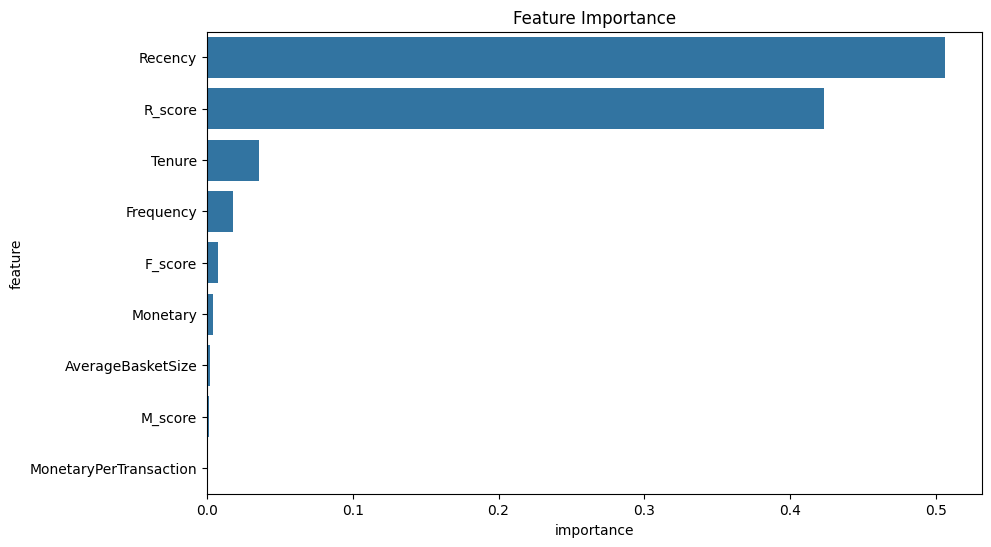

In [71]:
# Feature importance

import seaborn as sns
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

### Interpretation of Results

As per the bar plot above, we can see that the features `Recency`, `R_score` and `Tenure` have the most impact on Customer Churn Prediction. 

The churn prediction models developed in this project demonstrate exceptional accuracy and reliability in identifying customers at risk of churning. This provides the business with a powerful tool for customer retention and long-term value maximization.

The near-perfect performance of both models, particularly the Random Forest, suggests that the features selected are highly predictive of churn behavior. This success in modeling indicates a deep understanding of the factors influencing customer decisions to stay or leave.  

However, it's crucial to remember that model performance in a controlled environment may differ from real-world applications. Continuous monitoring and refinement will be key to maintaining this high level of predictive performance.